<a href="https://colab.research.google.com/github/am-galal/healthcare-predictive-analytical-application-for-heart-diseases/blob/main/Graduation_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
 from google.colab import drive
 drive.mount('/content/drive')

In [ ]:
path = "/content/heart_2022_with_nans.csv"
data=pd.read_csv(path)

<ipython-input-27-914bbc39e35c>:2: DtypeWarning: Columns (30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(path)


In [ ]:
data.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.6,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.5,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.5,23.3,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197329 entries, 0 to 197328
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      197329 non-null  object 
 1   Sex                        197329 non-null  object 
 2   GeneralHealth              196787 non-null  object 
 3   PhysicalHealthDays         192302 non-null  float64
 4   MentalHealthDays           193264 non-null  float64
 5   LastCheckupTime            193805 non-null  object 
 6   PhysicalActivities         196767 non-null  object 
 7   SleepHours                 194941 non-null  float64
 8   RemovedTeeth               191471 non-null  object 
 9   HadHeartAttack             195844 non-null  object 
 10  HadAngina                  195289 non-null  object 
 11  HadStroke                  196582 non-null  object 
 12  HadAsthma                  196494 non-null  object 
 13  HadSkinCancer              19

In [ ]:
##cheack if data has duublicate
data.duplicated().sum()

np.int64(2728)

In [ ]:
#dop dublicates but keep once
data.drop_duplicates(inplace=True)
data.duplicated().sum()

np.int64(0)

In [ ]:
 data.drop(['RemovedTeeth'],axis =1, inplace=True)

In [ ]:
# data.drop(['HadSkinCancer'],axis =1, inplace=True)

In [ ]:
# data.drop(['DeafOrHardOfHearing'],axis =1, inplace=True)

In [ ]:
# data.drop(['BlindOrVisionDifficulty'],axis =1, inplace=True)

In [ ]:
# data.drop(['DifficultyConcentrating'],axis =1, inplace=True)

In [ ]:
# data.drop(['DifficultyDressingBathing'],axis =1, inplace=True)

In [ ]:
# data.drop(['HeightInMeters'],axis =1, inplace=True)

In [ ]:
# data.drop(['HadCOPD'],axis =1, inplace=True)

In [ ]:
# data.drop(['HadAsthma'],axis =1, inplace=True)

In [ ]:
# data.drop(['HadKidneyDisease'],axis =1, inplace=True)

In [ ]:
## cheack if data has nulls
data.isna().sum()

,0
State,0
Sex,0
GeneralHealth,538
PhysicalHealthDays,4968
MentalHealthDays,4014
LastCheckupTime,3488
PhysicalActivities,549
SleepHours,2358
HadHeartAttack,1458
HadAngina,2013


In [ ]:
#VALIUES IN hadhurt attack
data['HadHeartAttack'].value_counts()
no_in_heart_attack=data['HadHeartAttack'].value_counts()[0]
yes_in_heart_attack=data['HadHeartAttack'].value_counts()[1]


<ipython-input-43-f7b79a6505ba>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  no_in_heart_attack=data['HadHeartAttack'].value_counts()[0]
<ipython-input-43-f7b79a6505ba>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yes_in_heart_attack=data['HadHeartAttack'].value_counts()[1]


In [ ]:
#make a group by between hadheartattack and genralhealth
data.groupby(['HadHeartAttack','GeneralHealth']).size()

HadHeartAttack  GeneralHealth
No              Excellent        30929
                Fair             22528
                Good             58750
                Poor              6632
                Very good        62820
Yes             Excellent          504
                Fair              3116
                Good              3674
                Poor              1793
                Very good         1915
dtype: int64

In [ ]:
#cheak the nulls in heartattack when general heath is Excellent
data[(data['HadHeartAttack'].isna()) & (data['GeneralHealth']=='Excellent')]
data.drop(data[(data['HadHeartAttack'].isna()) & (data['GeneralHealth']=='Excellent')].index, inplace=True)

In [ ]:
data.groupby(['HadHeartAttack','GeneralHealth']).size()

HadHeartAttack  GeneralHealth
No              Excellent        30929
                Fair             22528
                Good             58750
                Poor              6632
                Very good        62820
Yes             Excellent          504
                Fair              3116
                Good              3674
                Poor              1793
                Very good         1915
dtype: int64

In [ ]:
data.isna().sum()

,0
State,0
Sex,0
GeneralHealth,538
PhysicalHealthDays,4955
MentalHealthDays,4003
LastCheckupTime,3466
PhysicalActivities,538
SleepHours,2341
HadHeartAttack,1328
HadAngina,1962


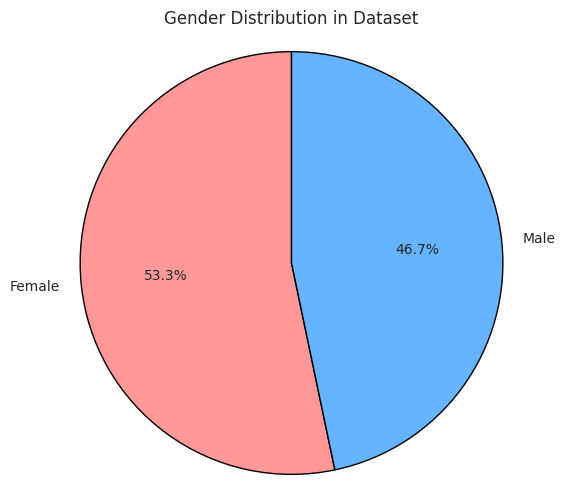

In [ ]:
gender_counts = data['Sex'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    colors=['#FF9999', '#66B3FF'],
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)

plt.title("Gender Distribution in Dataset")
plt.axis('equal')
plt.show()

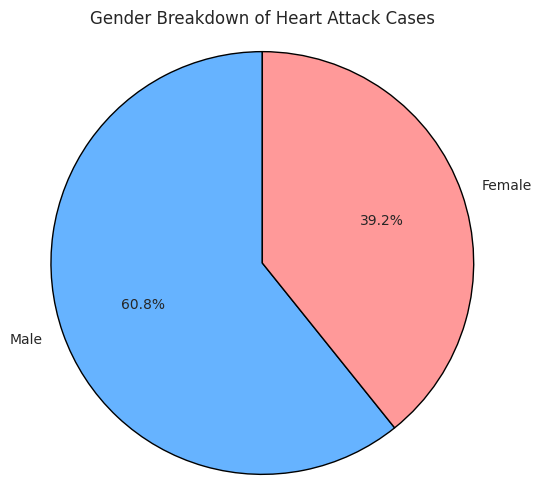

In [ ]:
heart_attack_only = data[data['HadHeartAttack'] == 'Yes']

# Count by gender
gender_heart_attack = heart_attack_only['Sex'].value_counts()

# Plot
plt.figure(figsize=(6, 6))
plt.pie(
    gender_heart_attack,
    labels=gender_heart_attack.index,
    autopct='%1.1f%%',
    colors=['#66B3FF', '#FF9999'],
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
plt.title("Gender Breakdown of Heart Attack Cases")
plt.axis('equal')
plt.show()

In [ ]:
def plot_heart_attack_rate_by(column):
    # Calculate % of "Yes" in HadHeartAttack for each group
    rates = data.groupby(column)["HadHeartAttack"].apply(lambda x: (x == "Yes").mean()).sort_values(ascending=False)

    # Plot it
    plt.figure(figsize=(10, 6))
    sns.barplot(x=rates.values, y=rates.index, palette="Reds_r")
    plt.title(f"Heart Attack Rate by {column}")
    plt.xlabel("Heart Attack Rate")
    plt.ylabel(column)
    plt.tight_layout()
    plt.show()

In [ ]:
data_clean = data.dropna(subset=['HadHeartAttack', 'State'])

# Calculate number of heart attacks and total entries per state
heart_attack_stats = data_clean.groupby('State')['HadHeartAttack'].value_counts().unstack().fillna(0)

# Calculate heart attack rate (percentage of 'Yes' out of total for each state)
heart_attack_stats['Rate'] = heart_attack_stats['Yes'] / (heart_attack_stats['Yes'] + heart_attack_stats['No']) * 100

# Get top 10 states with highest heart attack rates
top_10_states = heart_attack_stats.sort_values(by='Rate', ascending=False).head(10).reset_index()

<ipython-input-59-35b6196a14d3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


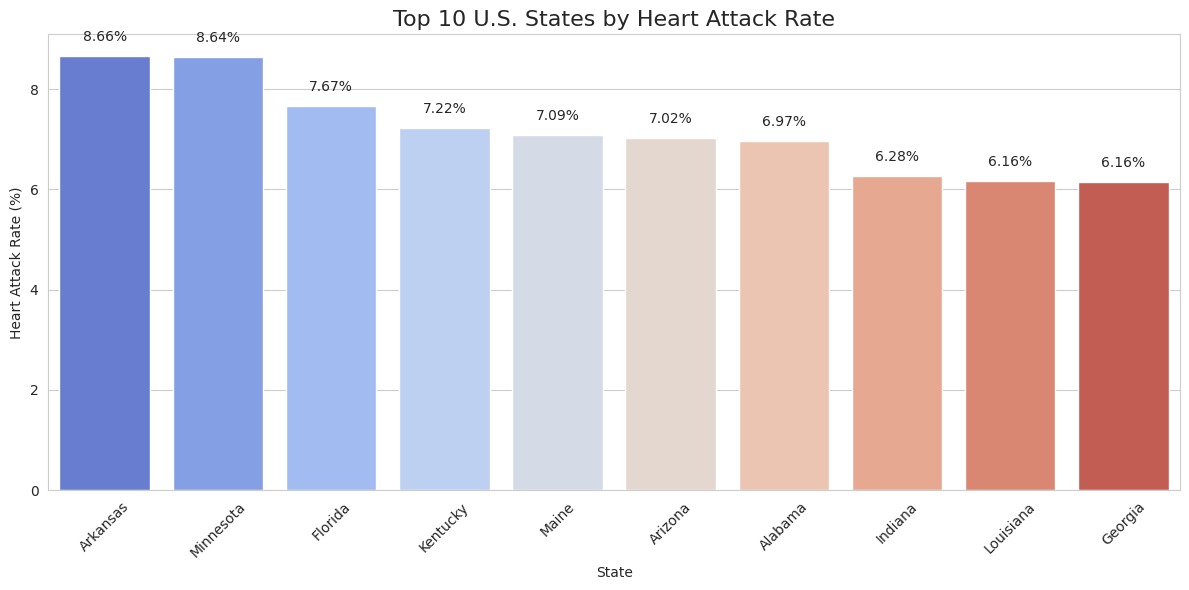

In [ ]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

barplot = sns.barplot(
    x='State', y='Rate', data=top_10_states,
    palette='coolwarm'
)

plt.xticks(rotation=45)

# Add text labels on top of bars
for index, value in enumerate(top_10_states['Rate']):
    plt.text(index, value + 0.3, f"{value:.2f}%", ha='center')

plt.title("Top 10 U.S. States by Heart Attack Rate", fontsize=16)
plt.xlabel("State")
plt.ylabel("Heart Attack Rate (%)")
plt.tight_layout()
plt.show()

<ipython-input-68-4e2dd466ae67>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


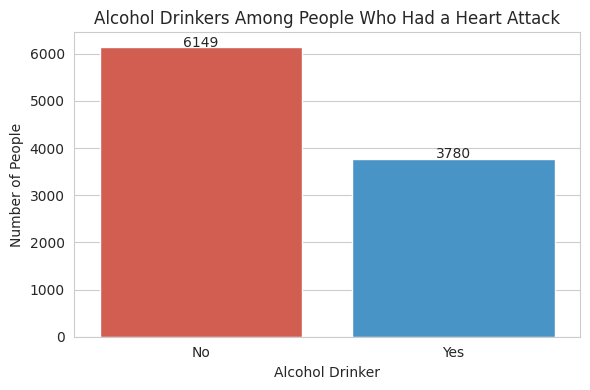

In [ ]:
heart_attack_only = data[data['HadHeartAttack'] == 'Yes']

# Count how many were drinkers vs non-drinkers
drinkers_vs_nondrinkers = heart_attack_only['AlcoholDrinkers'].value_counts()

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(
    x=drinkers_vs_nondrinkers.index,
    y=drinkers_vs_nondrinkers.values,
    palette=['#E74C3C', '#3498DB']  # red for 'Yes', blue for 'No'
)

# Add text labels
for i, value in enumerate(drinkers_vs_nondrinkers.values):
    plt.text(i, value + 1, str(value), ha='center')

plt.title("Alcohol Drinkers Among People Who Had a Heart Attack")
plt.xlabel("Alcohol Drinker")
plt.ylabel("Number of People")
plt.tight_layout()
plt.show()

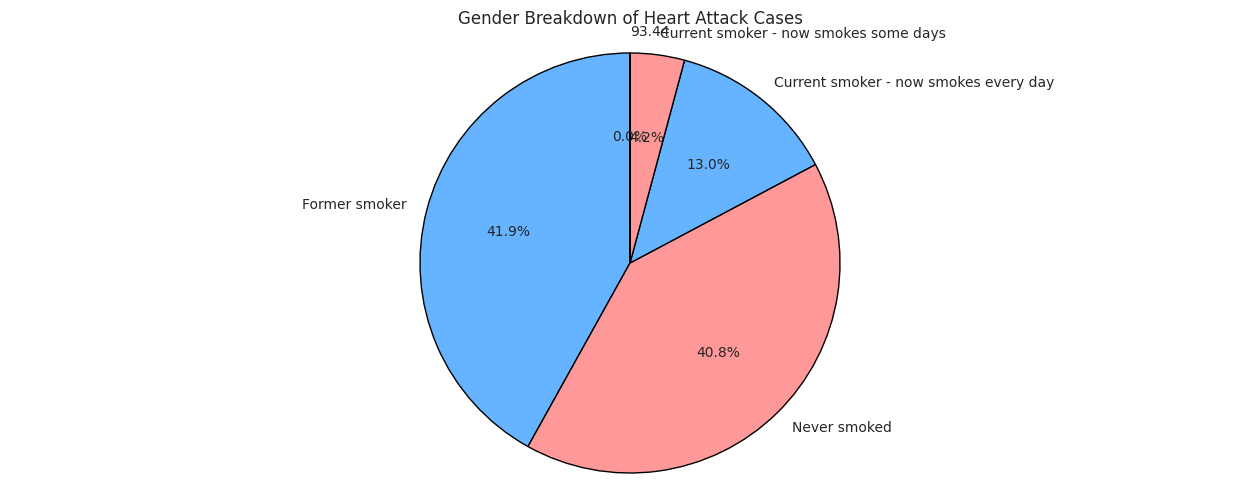

In [ ]:
heart_attack_only = data[data['HadHeartAttack'] == 'Yes']

# Count by gender
gender_heart_attack = heart_attack_only['SmokerStatus'].value_counts()

# Plot
plt.figure(figsize=(16, 6))
plt.pie(
    gender_heart_attack,
    labels=gender_heart_attack.index,
    autopct='%1.1f%%',
    colors=['#66B3FF', '#FF9999'],
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
plt.title("Gender Breakdown of Heart Attack Cases")
plt.axis('equal')
plt.show()

<ipython-input-76-d0e4473c9d67>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-76-d0e4473c9d67>:8: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


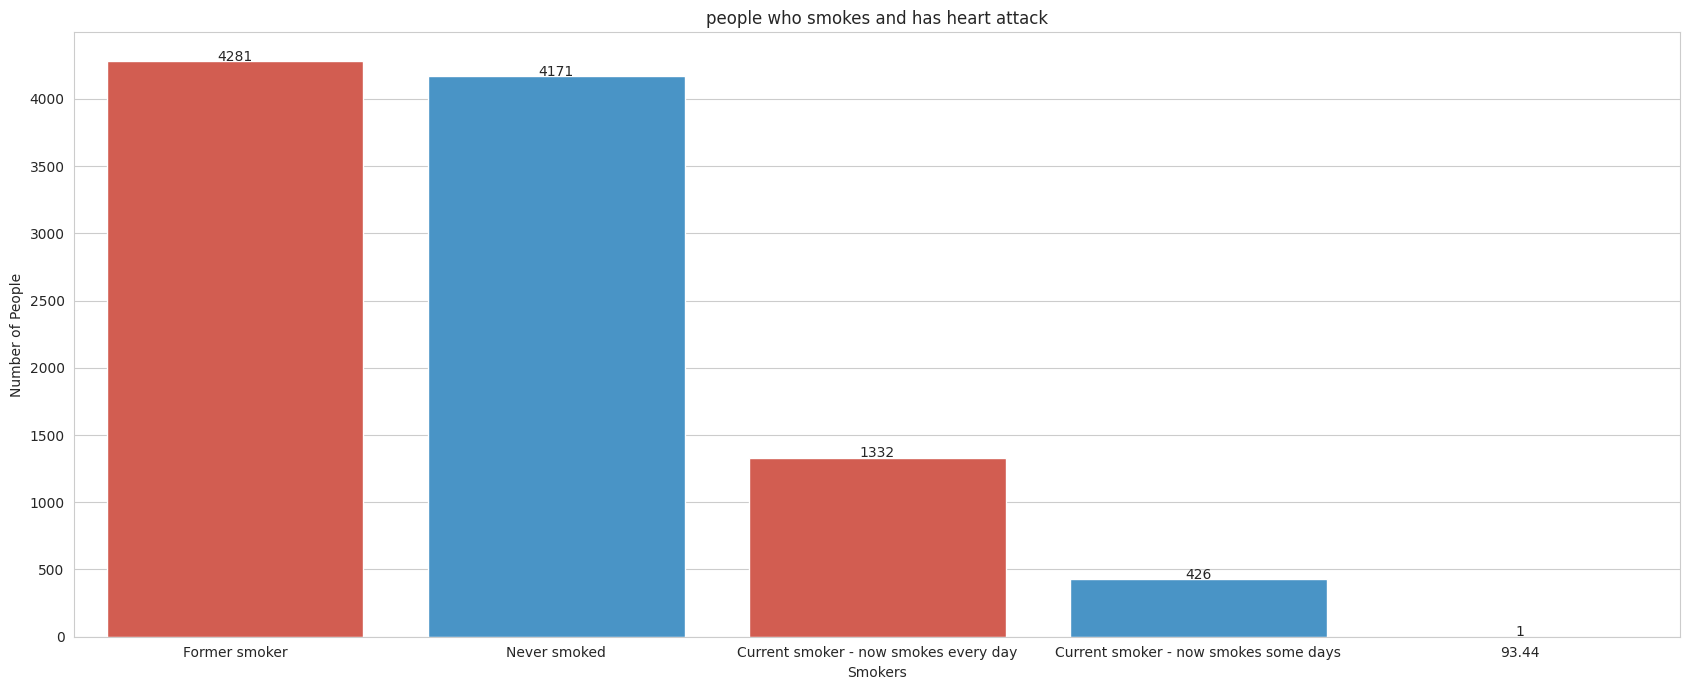

In [ ]:
heart_attack_only = data[data['HadHeartAttack'] == 'Yes']

# Count how many were drinkers vs non-drinkers
smokers_vs_none = heart_attack_only['SmokerStatus'].value_counts()

# Plot
plt.figure(figsize=(17, 7))
sns.barplot(
    x=smokers_vs_none.index,
    y=smokers_vs_none.values,
    palette=['#E74C3C', '#3498DB']  # red for 'Yes', blue for 'No'
)

# Add text labels
for i, value in enumerate(smokers_vs_none.values):
    plt.text(i, value + 1, str(value), ha='center')

plt.title("people who smokes and has heart attack")
plt.xlabel("Smokers")
plt.ylabel("Number of People")
plt.tight_layout()
plt.show()

<ipython-input-16-fc97585c73ce>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rates.values, y=rates.index, palette="Reds_r")


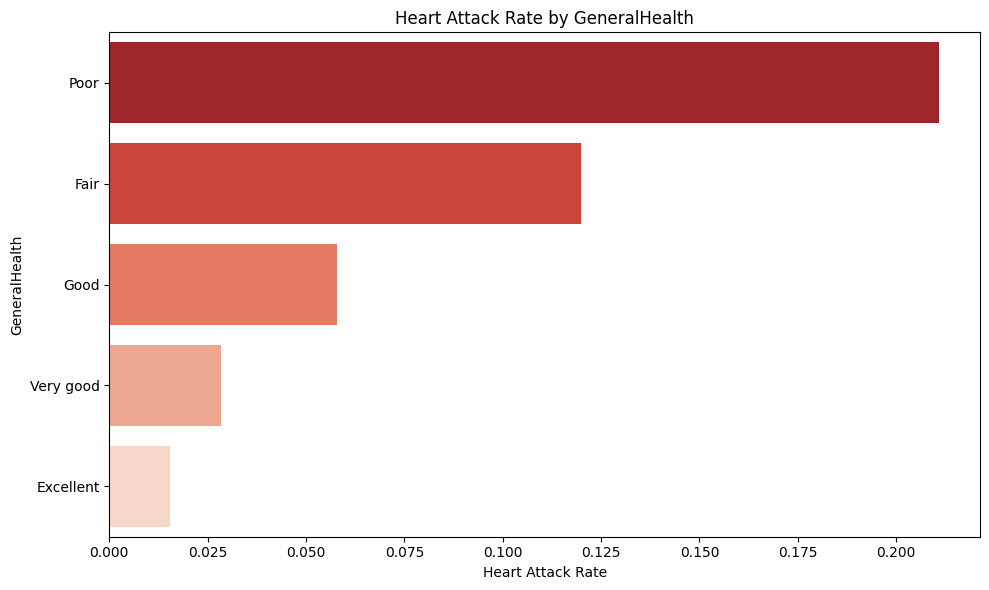

In [ ]:
plot_heart_attack_rate_by("GeneralHealth")


<ipython-input-16-fc97585c73ce>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rates.values, y=rates.index, palette="Reds_r")


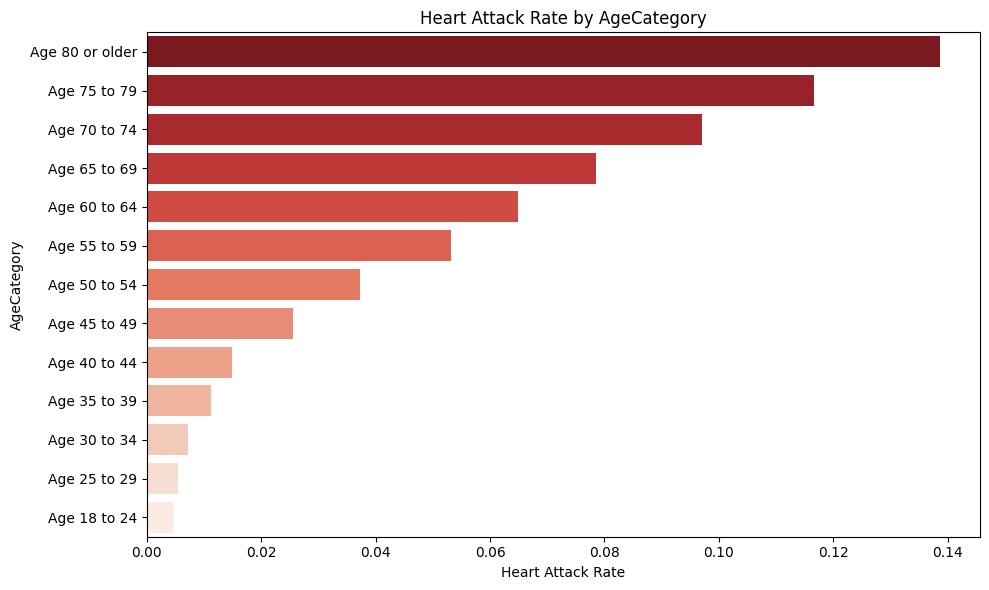

In [ ]:
plot_heart_attack_rate_by("AgeCategory")

In [ ]:
#found who smoke and didn't have heart attack
data[(data['SmokerStatus']=='Current') & (data['HadHeartAttack']=='No')]

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos


In [ ]:
  # hadel nulls in WeightInKilograms by mod
data['WeightInKilograms'].fillna(data['WeightInKilograms'].mode()[0], inplace=True)

<ipython-input-24-28154643e902>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['WeightInKilograms'].fillna(data['WeightInKilograms'].mode()[0], inplace=True)


In [ ]:
#fill all data with midian
data.fillna(data.ffill(), inplace=True)

In [ ]:
#handel nulls with backwards
data.fillna(method='bfill', inplace=True)


<ipython-input-27-d6ed7faa274d>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)


In [ ]:
data.isna().sum()

,0
State,0
Sex,0
GeneralHealth,0
PhysicalHealthDays,0
MentalHealthDays,0
LastCheckupTime,0
PhysicalActivities,0
SleepHours,0
HadHeartAttack,0
HadAngina,0


In [ ]:
catlist=[]
numlist=[]
for coulmn in data.columns:
  if data[coulmn].dtype == 'object':
    catlist.append(coulmn)
  else:
    numlist.append(coulmn)
catlist


['State',
 'Sex',
 'GeneralHealth',
 'LastCheckupTime',
 'PhysicalActivities',
 'HadHeartAttack',
 'HadAngina',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabetes',
 'DeafOrHardOfHearing',
 'BlindOrVisionDifficulty',
 'DifficultyConcentrating',
 'DifficultyWalking',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'SmokerStatus',
 'ECigaretteUsage',
 'ChestScan',
 'RaceEthnicityCategory',
 'AgeCategory',
 'AlcoholDrinkers',
 'HIVTesting',
 'FluVaxLast12',
 'PneumoVaxEver',
 'TetanusLast10Tdap',
 'HighRiskLastYear',
 'CovidPos']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
orde=OrdinalEncoder()
orde.fit(data[catlist])
data[catlist]=orde.transform(data[catlist])




In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop(['HadHeartAttack','GeneralHealth'], axis=1), data['HadHeartAttack'], test_size=0.02, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)


0.9450252951096122

In [ ]:
rf.score(x_train,y_train)

0.9999747605116732

In [ ]:
rf.score(x_test,y_test)

0.9450252951096122

In [ ]:

print(classification_report(y_test, rf.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      8379
         1.0       0.59      0.18      0.27       516

    accuracy                           0.95      8895
   macro avg       0.77      0.58      0.62      8895
weighted avg       0.93      0.95      0.93      8895



In [ ]:
data.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,0.0,0.0,4.0,0.0,0.0,3.0,0.0,8.0,0.0,0.0,...,1.60,90.72,26.57,0.0,0.0,1.0,0.0,2.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,3.0,0.0,6.0,0.0,0.0,...,1.60,68.04,26.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,4.0,2.0,3.0,3.0,1.0,5.0,0.0,0.0,...,1.57,63.50,25.61,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,0.0,0.0,0.0,0.0,0.0,3.0,1.0,7.0,0.0,0.0,...,1.65,63.50,23.30,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,2.0,0.0,3.0,1.0,9.0,0.0,0.0,...,1.57,53.98,21.77,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
data.to_csv('exported_heart_data.csv', index=False)

# How does heart attack risk vary by:

AgeCategory?

Gender?

State?

SmokerStatus?

→ Use: Bar plots

TypeError: heatmap() takes 1 positional argument but 5 positional arguments (and 1 keyword-only argument) were given